In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'Diabetic']
# load dataset and attach corresponding label to each column of the raw data
dbts_ds= pd.read_csv('C:/Users/Administrator/thames dm_python/dataset/pima_diabetes.csv', header=None, names=col_names)
dbts_ds.head(40)  # display first 40 rows of a dataset

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# check dimensions i.e. number of rows and columns in ths dataset

In [7]:
print(id(dbts_ds))

301552840


In [3]:
dbts_ds.shape

(768, 9)

# Determine how many rows are related to diabetic (1) class and non diabetic (0)  in the total 768 rows of data

In [12]:
dbts_ds.groupby('Diabetic').size()

Diabetic
0    500
1    268
dtype: int64

# View statistical details about the data 

In [3]:
dbts_ds.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dbts_ds.describe().T  # transpose this table and see more easily

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetic,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Exploratory Data Analysis (EDA)  - A preliminary examination of the dataset to better understand its patterns and properties through visualization.

### 1.1  Histogram - here we look at the distribution of each attribute by discretizing the continuous values into buckets and  count the frequency  in each bucket as histograms.

> Histogram is formed by couting the frequency of each  values in the attribute and then plotting it as bargraph. 

#### This lets us note interesting properties of the attribute distributions such as the possible normal distribution of attributes  associated with the features of the dataset or skewness of the data feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000124287C8>,
      dtype=object)

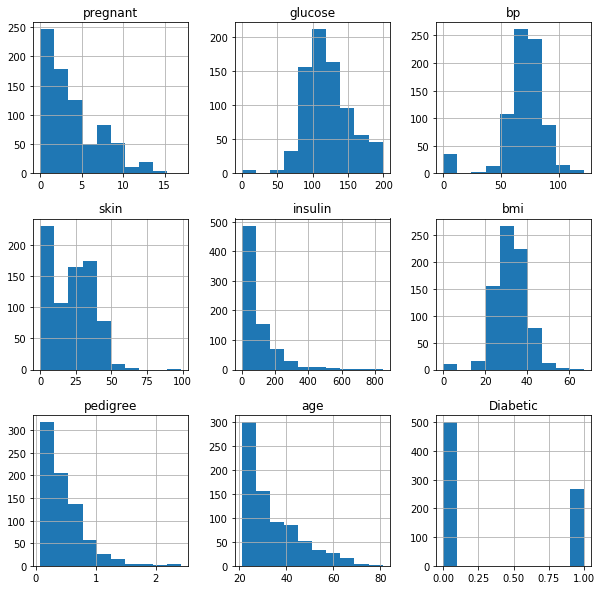

In [3]:
dbts_ds.hist(figsize = (10,10))  # since this EDA is preliminary data analysis we use the raw dataset dbts_ds but we can also
        #  use the dataset cleaned after missing values or after some pre-processing
        #  is done like take the dataset dbts_new,it utlimately depends upon what dataset we want to visulaize 

## Histogram Data Interpretation of each attributes above

#### Each picture above is a histogram  that shows the distribution of  each feature or attibute. Each figure represents a univariate distribution. i.e. involving only one variable or feature.

#### If we analyze  the picture of each attributes say bp, glucose, insulin etc then we can observe that  some feature like "BP" shows normal distribtuion while features like "INSULIN", "PEDIGREE" show the curve is long tailed twoard right hence right skewed.
> Hence real dataset not only contains normal distritbuion but left or right skewed too i.e. contains long tail along the  right or left side

###  Checking skewed distribution of each attribute numerically or by simply visualizing the distribution of each attribute as above in histogram gives meanignful insights about the data feature. 
> Because based on how spread the data is we can select one statistical measure over the other to fill in the missing value. <font color = green>For example, attribute "GLUCOSE" has some missing values and its distritbuion is normal so we can replace mean in the missing place for that atteibute where as attribute "INSULIN" is right skewed so its better to replace missing values  with median than mean assuming median as the center of data. Such insights are identified from the visualization part as like histogram here </font>
 
   
## Skewed distribution of any attribute will lead to low model accuracy because many algorithms assume each attribute has gaussian/normal distribtuion 
 
## The rule is -- if there is any algorithm that is based on gaussian or normal distribtuon then we need to convert the skewness of any attribute to normal distribution for better results


### <font color = green> Certain insights from the histogram plot </font>
1. we have idnetifed whether a data is normally distributed or skewed   
    1. i.e. "glucose" as normally distributed while "insulin" as right skewed)
2. Once we indeitfy the type of ditribution we can apply specific approach for missing values based on data distribution
    2. i.e. we may replace the missing value of  "glucose" as mean and missing value of  "insulin" as median.
3. Most of the learning models are based on Normal/Gaussian distribution (the bell shaped curve). So if any data feature is skewed we can transform it into normal distribution then impute the missing values and then feed the learning model.Because such models make good prediciton if data are distributed normally.
    3. Algorithms are biased when the data distritbuion is skewed i.e. if the learning algorithm(model) gets trained on the above insulin distribution then the model gives more accurate result on people with insulin level less than 250 but gives incorrect prediction  on people with insulin level grater then 350
 

### Check the skewness degree of each atribute.  Values near zero are less skewed as compared to values away from it. Distribtuions that have skewness value less than -1 or greater than +1 are skewed.

In [5]:
print("Also check this skew value of each attribute in the histogram and you can make a lot of sense by simply seeing the skewnesss of each attibute ")

skew_attrib_val = dbts_ds.skew()
print(skew_attrib_val)

Also check this skew value of each attribute in the histogram and you can make a lot of sense by simply seeing the skewnesss of each attibute 
pregnant    0.901674
glucose     0.173754
bp         -1.843608
skin        0.109372
insulin     2.272251
bmi        -0.428982
pedigree    1.919911
age         1.129597
Diabetic    0.635017
dtype: float64


### Data Interpretation of above result -->From above skew value, we found that glucose, pregnancy are normally distributed while features like bp, insulin, pedigree etc are skewed.

## Another Insight from histogram data -->The  imbalanced class in the classification problem

### Below figure shows there's lot more observations for one class than another and may need special handling in the data preparation

## To know such imblanace --> Either use a count function or  visulaize through a histogram   - below figure shows a lot more non-diabetic observations than diabetic which needs special handling. 

Diabetic
0    500
1    268
dtype: int64


Diabetic
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: glucose, dtype: object

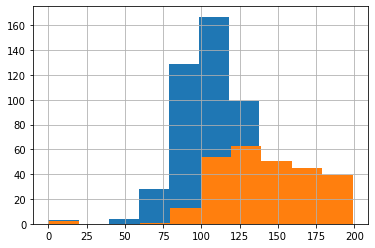

In [8]:
output_grp = dbts_ds.groupby('Diabetic').size()
print(output_grp)

dbts_ds.groupby('Diabetic').glucose.hist(alpha=1)

The above figure shows that there are a lot more non diabetic patient than diabetes patients in the total 768 observations. 
****
<b>Training model on such imbalanced classes will likely predict the majority class (non diabetic) and hence the model will have low accuracy predicting diabetic population. </b>

### Box Plots 
****
<b> Visualize data distritbution's median as thick line within the box, interquartile range with 25th percentile as left most boundary and  75th percetnile as right most boundary. Data outisde of these interquartile range are considered outliers.</b>

###### From the diagram below Insulin has the highest outliers while glucose has the lowest

MODIFIED  PIMA_NEW DATASET


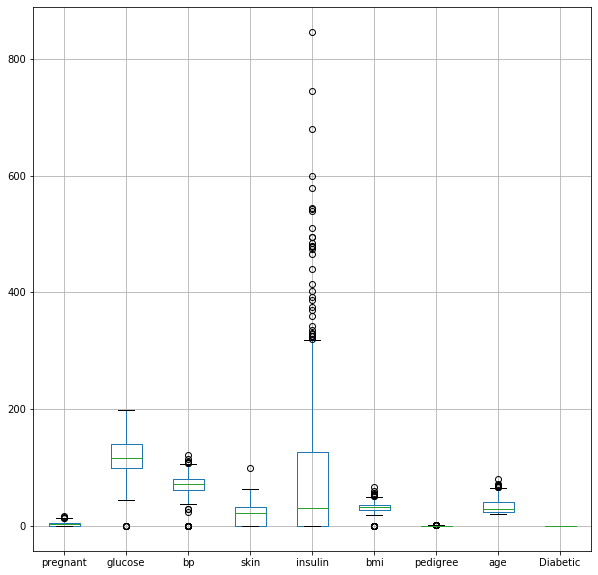

In [3]:
dbts_ds.boxplot(figsize =(10,10))
print("MODIFIED  PIMA_NEW DATASET")

### 1.2 Scatter Plot
****
For identifying patterns or relationship between two variables or features -

###  for example from below figure we can see "age vs pregnant" and  "skin vs bmi"  has strong co-rrelation with each other in below scatter plot diagram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000125F6348>,
      dtype=object)

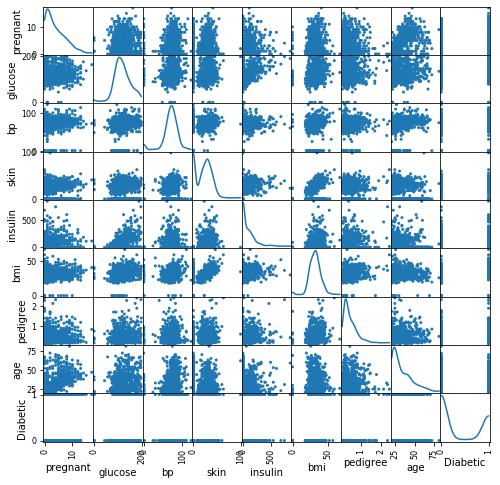

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(dbts_ds, alpha=1, figsize=(8, 8), diagonal='kde')

## 1.3 Heatmap Plot 
****
Identifying correlation between two attributes, values nearer to +1 represents stronger linear relationship between two variables while values nearer to  -1 represents  inverse relation. 

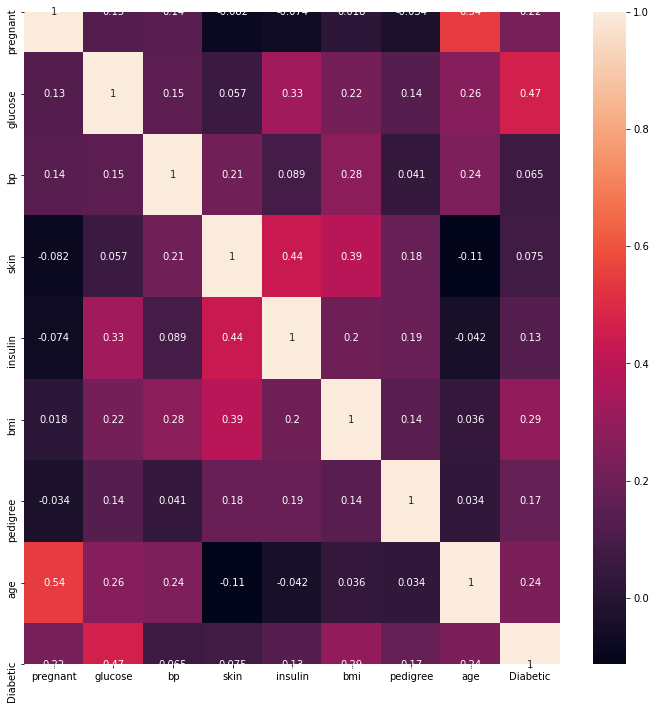

In [3]:
plt.figure(figsize=(12,12))  # we set the size of figure to 12 by 12.
dbts_ds=sns.heatmap(dbts_ds.corr(), annot=True)  # use seaborn library heatmap

# 2. Data Quality 
### <font color = red>!! </font>Note : While many of our focus is on building learning models, an equally important but much underestimated part in the machine and deep learning pipeline is the data preparation process.<font color = red> It's very important that the learning algorithm gets correct and unbiased data depending on the scenario of the problem.</font> Hence quality data preparation is of utmost imporatnce and everyone need to take a lot of care about it.

> <font color = red>Beacaue the accuracy and  diverse consequences of learning algorithms depends upon the quality of the data.</font>  

### Data Quality and its importance --> Before performing any decision making task, we need to consider about the reliability of the dataset from which the decisions are made. This is where data quality comes in.
##  Quality of a dataset is evaluated on the following factors:
     1. How accurate the dataset is ?
     2. Is the dataset complete ,consistent and upto date?
     3. Is the dataset unique?
****
Analyzing the  data  based on above factors determines the reliability of a dataset for  use in decision making task. The more qualitative our dataset is, the better our decision will be. Hence data quality refers to goodness and fitness of data for a particular task.


### What happens when the data is not qualitative ???
  #### An example of poor data quality : When a classification model for detecting people who are loan risks is built using poor data
#### The model has the following the negative consequence :
  #####  1. Some credit-worthy candidates are denied loans
  ##### 2. More loans are given to individuals that default   <font color = red> 
   
 ### In other words avoiding data quality is a serious problem. Hence data mining needs to focus on :
 #### 1. detection and correction of data quality problems
 #### 2. the use of algorithms that can tolerate poor data quality.

   
### src from--> Tan, Steinbach, Karpatne, Kumar, Introduction to Data Mining 2nd Ed., McGraw Hill 2018
   

### Some of the data quality problems that are dealt in this PIIMA dataset is as follows:
#####  1. Missing values 
#####  2. Duplicate Data
####   3. Outliers


1. Missing Values 
    

#### Missing values refers to those data that had real world values but were not captured. It is different than empty data. In empty data it has no any real value.

>  Dataset contains missing values in may rows or columns.It may be due to various factors  like the person whose data is being collected  may be hesitated to give their personal data.  Or may be since the data collected is from various sources, many forms for data entry part either have optional entry fields or  does not have these fields specific to certain attributes in a dataset. Whatever the reason for missing value is we must consider identifying and handling  missing values,  if we are to improve the data quality and reliable decision making. 

## 2.1 Identify Missing values in a dataset

### 2. 1. 1. First Identify the spots in the dataset where missing values are present:

   #### 2.1.1.1. Mark missing values as "NaN" in  rows or columns of the dataset. Sum, count etc operations ignores NAN values. 
   ****
   By  using the "replace()" function of  Pandas DataFrame we can mark the  missing values as "NAN" in each columns.

   #### 2.1.1.1.2. Then we can use "isnull()" function to mark  all "NAN" values in the dataset  as True and based on it we can count total number  of missing values in each column. Then replace "0"  with "NAN"


In [3]:
dbts_new  = dbts_ds.copy(deep = True)
dbts_new [['glucose','bp','skin','insulin','bmi']] = dbts_new [['glucose','bp','skin','insulin','bmi']].replace(0,np.NaN)
print("below table shows we marked the feature value from glucose to bmi as NAN in missing fields in PIMA_NEW dataset")
print(dbts_new.isnull().sum())

below table shows we marked the feature value from glucose to bmi as NAN in missing fields in PIMA_NEW dataset
pregnant      0
glucose       5
bp           35
skin        227
insulin     374
bmi          11
pedigree      0
age           0
Diabetic      0
dtype: int64


In [4]:
print(dbts_new.head(40))   # print the first 20 rows with values of pima origianl

    pregnant  glucose    bp  skin  insulin   bmi  pedigree  age  Diabetic
0          6    148.0  72.0  35.0      NaN  33.6     0.627   50         1
1          1     85.0  66.0  29.0      NaN  26.6     0.351   31         0
2          8    183.0  64.0   NaN      NaN  23.3     0.672   32         1
3          1     89.0  66.0  23.0     94.0  28.1     0.167   21         0
4          0    137.0  40.0  35.0    168.0  43.1     2.288   33         1
5          5    116.0  74.0   NaN      NaN  25.6     0.201   30         0
6          3     78.0  50.0  32.0     88.0  31.0     0.248   26         1
7         10    115.0   NaN   NaN      NaN  35.3     0.134   29         0
8          2    197.0  70.0  45.0    543.0  30.5     0.158   53         1
9          8    125.0  96.0   NaN      NaN   NaN     0.232   54         1
10         4    110.0  92.0   NaN      NaN  37.6     0.191   30         0
11        10    168.0  74.0   NaN      NaN  38.0     0.537   34         1
12        10    139.0  80.0   NaN     

In [6]:
dbts_ds.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2.2  Handle Missing values --many ways to deal with missing values. But the goal is whatever  approach we take, our decision must be accurate or as close to accuracy as if there were real data values in the missing part. 

-->it's also important to note that the approach we take to handle missing values direclty affects the decision making part or our learning model.Hence multiview analysis must be chosen to identify which approach is the best one that fits our purpose  

#### <font color = red > !! Note on missing value problem --> It's not possible to identify the empty value versus missing value unless the dataset specifies  discrimination about the data collection process. For such determination we need to provide information about the way data is collected and assumptions while the data is being filled. This is important. Also we need to focus on domian knowledge and emphaisze its importance. </font>

> Because whatever the reason for missing value may be, our goal is not to distort the dataset either by imputation or by other techniques. And our manipulative operation to fill the missing value should by no means make the dataset biased. Based on this principle we need to handle the mssing data problem.

 Information about the real missing data while a data in being collected need to be emphaized in the dataset. For example --> may be a patient entry form consists of fields where the patient didn't entered the data for various reasons, such additional information need to be written in the dataset description section.  
 
 <font color = green> ???? Then How do we handle missing values --> one possible way is to prepare a dataset that applies different techniques. Like preparing a dataset by replacing missing values as mean or  replacing missing values as usign median, or just eliminating the missing value rows or do nothing or use some advanced methods to fill in the misisng values. Then analyze the prediction score of the learning model as well as the distortion degree to which the model reflects  based on dataset prepared from different ways.</font>
 
## <font color = red> Replacing missing values without sufficent knowledge and critical evaluation can eliminate the real facts in the data set. <u>So if we can capture about the patterns that existed in missing values then we can replace the values accordingly</u> </font>
 
### Below  is a list of some techniques for missing values and the data analyst need to be careful about which approch to use depending on the domian and sensitivity of the problem.

### 2.2.1. Eliminate rows containing missing values - 
#### Though this approach is not suitable in many practical cases, it is preferred if  only a few rows (that represents each object in a data set) have missing values. However its impractical to remove the rows when most records are missing.   

> For eliminating rows with missing values use "object.dropna()" method but it requires all missing values to be replaced by "NAN" first which we have already done previously

In [4]:
dbts_ds[['glucose','bp','skin','insulin','bmi']] = dbts_ds[['glucose','bp','skin','insulin','bmi']].replace(0, np.nan)
dbts_ds.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
cln_data  = dbts_ds.dropna()  # eliminate rows containing missing values
cln_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


### 2.2.2 Detect if there are any duplicate rows -True for duplicate and false for unique rows. If two or more rows refers to identical objects and the attribute vaue are exaclty similar then we can simply remove the duplicated rows. 

In [3]:
dbts_ds.duplicated()  # "object.duplicated" function to idenftify duplicate rows

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

> #### Since each of the column values came as false we can say that there are no duplicate values

### 2.2.3. Missing values can be repalced by mean, median , quartiles or based on the type and nature of attribute values i.e whether the attribute or the column data is continuous, categorical or the similarity values of the observed data. Its also equally important to take into account the effect on accuracy of the learning algorithm based on the imputation approach.  

*** 
<font color = red>From the histogram of exploratory data analysis, "glucose", "bmi", "skin" features are normally distributed  so we replace mean value in the missing elelemnt part while  "insulin" and "bp" are skewed so we replace meadian value in the missing part.  </font>

##### Filling the mean and median value  according to corresponding histogram distribution in the missing part  using fillna() method

## Impute missing values through measures of central tendency based on feature histogram 

In [48]:
 dbts_new.fillna({"glucose":dbts_new['glucose'].mean(), "bp": dbts_new['bp'].median(), 
                  "skin": dbts_new['skin'].mean(),"insulin": dbts_new['insulin'].median(),
             "bmi": dbts_new['bmi'].median() },inplace=True)


In [49]:
dbts_new   # show newly imputed values in corresponsing misisng place as a result of above code

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47,1


### Specific missing column values are  repalced by corresponding mean or median  based on histogram anaysis of each attribute.  

****
### Another important tip for solution to mising value and data quality problem 

#### Know the nature of the data from which you are going to model -VVY imp rather than coding 

### Domain knowldge about the problem i.e. activley asking domain expert about the problems -In this case  -asking a diabetic doctor to get the understanding of  possible  missing values would create our model better and reliable

##### still if we see the original data it may not be good to fill missing  values for pregnancy by models instead if we correlate the domian knowledge  about pregnancy, insulin and glucose, there may be some relation based on which we can fill the missing data for pregnancy based on glucose and insulin level 

## If possible with expert advice,this is another way to fill missing value in each column based on certain medical knowledge or fact 




## Save cleaned dataset

In [7]:
dbts_new.to_csv('C:/Users/Administrator/thames dm_python/dataset/imputed_data_diabetes.csv')

# split the cleaned data into training and testing dataset with

## training  dataset a= 80%* cleaned data and test dataset  = 20%*cleaned dataset

In [50]:
array = dbts_new.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


## 3. Data Discretization and Binarization

#### Motivation for Data type Suitability to a learning algorithm
****
Data in a dataset can be in several forms. i.e some features/column contains numbers as its value, while other columns in the same dataset contains  texts etc etc. <font color = red>This heterogenity of the data makes the learning algorithms unfit for its input because most of the learning algorithms take the data in numeric format.</font>
****
<font color = green>So there must be a way to convert multiple data type in numeric fomrat that's suitable for the learning algorithm to process. This is where data discretization and binarization comes into play.<font>   

### Data Discretization - Conversion from continuous  data(numeric) to categorical value is discretization.Generally we use it for classification tasks.

#### We  Apply Discretization using --> Data Bining Method

##  Data Bining can be achieved by cut method  - "Cut()" will group data and apply user defined labels  

### Syntax - pd.cut(x, bins, labels = None) 


In [7]:
glc_level_chk_dta = pd.read_csv('C:/Users/Administrator/thames dm_python/dataset/imputed_data_diabetes1.csv')
glc_level_chk_dta.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,6,148.0,72,35.00000,125,33.6,0.627,50,1
1,1,85.0,66,29.00000,125,26.6,0.351,31,0
2,8,183.0,64,29.15342,125,23.3,0.672,32,1
3,1,89.0,66,23.00000,94,28.1,0.167,21,0
4,0,137.0,40,35.00000,168,43.1,2.288,33,1


In [12]:
print("Maximum Marks: ", glc_level_chk_dta ['glucose'].max())
print("Minimum Marks: ", glc_level_chk_dta ['glucose'].min())

Maximum Marks:  199.0
Minimum Marks:  44.0


## Create two buckets for  glucose values of 0-140 and 140-199

In [8]:
glc_level_chk_dta['bin'] = pd.cut(glc_level_chk_dta['glucose'], bins = [0,140,199])
glc_level_chk_dta.head(20)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic,bin
0,6,148.0,72,35.00000,125,33.6,0.627,50,1,"(140, 199]"
1,1,85.0,66,29.00000,125,26.6,0.351,31,0,"(0, 140]"
2,8,183.0,64,29.15342,125,23.3,0.672,32,1,"(140, 199]"
3,1,89.0,66,23.00000,94,28.1,0.167,21,0,"(0, 140]"
4,0,137.0,40,35.00000,168,43.1,2.288,33,1,"(0, 140]"
5,5,116.0,74,29.15342,125,25.6,0.201,30,0,"(0, 140]"
6,3,78.0,50,32.00000,88,31.0,0.248,26,1,"(0, 140]"
7,10,115.0,72,29.15342,125,35.3,0.134,29,0,"(0, 140]"
8,2,197.0,70,45.00000,543,30.5,0.158,53,1,"(140, 199]"
9,8,125.0,96,29.15342,125,32.3,0.232,54,1,"(0, 140]"


****
<b>Above code and table shows conversion of glucose attribute value(continuous) in the 2nd column to its corresponding specific bin size at the right most part.</b>

#### After creating two bucktes for different insulin ranges, create one labels  "Normal" for glucose  range of 0-140  and  "Prediabetic or Risky" for range of 140-199 as in below code and tables

In [9]:
glc_level_chk_dta['bin'] = pd.cut(glc_level_chk_dta['glucose'], bins = [0,140,199], labels = ['Normal','Prediabetic or Risky'])
glc_level_chk_dta.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic,bin
0,6,148.0,72,35.00000,125,33.6,0.627,50,1,Prediabetic or Risky
1,1,85.0,66,29.00000,125,26.6,0.351,31,0,Normal
2,8,183.0,64,29.15342,125,23.3,0.672,32,1,Prediabetic or Risky
3,1,89.0,66,23.00000,94,28.1,0.167,21,0,Normal
4,0,137.0,40,35.00000,168,43.1,2.288,33,1,Normal
5,5,116.0,74,29.15342,125,25.6,0.201,30,0,Normal
6,3,78.0,50,32.00000,88,31.0,0.248,26,1,Normal
7,10,115.0,72,29.15342,125,35.3,0.134,29,0,Normal
8,2,197.0,70,45.00000,543,30.5,0.158,53,1,Prediabetic or Risky
9,8,125.0,96,29.15342,125,32.3,0.232,54,1,Normal


In [12]:
##  show column values of glucose label and its corresponsing categorical value as created in bin
dta_frm = glc_level_chk_dta[['glucose','bin']]
dta_frm.head()

,glucose,bin
0,148.0,Prediabetic or Risky
1,85.0,Normal
2,183.0,Prediabetic or Risky
3,89.0,Normal
4,137.0,Normal


####  replace each glucose value with its correspoding categorical bin value

In [13]:
glc_level_chk_dta['glucose'] = glc_level_chk_dta['bin'].values  
glc_level_chk_dta.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic,bin
0,6,Prediabetic or Risky,72,35.00000,125,33.6,0.627,50,1,Prediabetic or Risky
1,1,Normal,66,29.00000,125,26.6,0.351,31,0,Normal
2,8,Prediabetic or Risky,64,29.15342,125,23.3,0.672,32,1,Prediabetic or Risky
3,1,Normal,66,23.00000,94,28.1,0.167,21,0,Normal
4,0,Normal,40,35.00000,168,43.1,2.288,33,1,Normal


#### Drop bin column  from the dataframe "glc_level_chk_dta" using (axis = 1,inplace =True) for column representation and store the modified content in the same dataframe respectively

In [14]:
glc_level_chk_dta.drop(['bin'], axis=1, inplace = True)
glc_level_chk_dta.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,6,Prediabetic or Risky,72,35.00000,125,33.6,0.627,50,1
1,1,Normal,66,29.00000,125,26.6,0.351,31,0
2,8,Prediabetic or Risky,64,29.15342,125,23.3,0.672,32,1
3,1,Normal,66,23.00000,94,28.1,0.167,21,0
4,0,Normal,40,35.00000,168,43.1,2.288,33,1


### Data Binarization --> Many machine learning tasks use binary data converted from categorcial ones. But the overall binarization process starts from mapping continuous attribute values to categorical and then to binary.
For example if a categorical attributes are {High, Medium, Low}  = its equivalent binarized form can be  = {111,101, 000}. Also if a categorical attribute has n different categories then n different binary values can be created.

### One of the  binarization methis is  --->   One Hot Encoding

#### convert each category value into a new column and assign a 1 or 0 (True/False) value to the column

#### Use pandas --> pd.get_dummies( obj_df, columns=[ "   " ] )   method  to realize one hot encoding


In [17]:
glc_level_chk_dta.glucose.value_counts() 

Normal                  576
Prediabetic or Risky    192
Name: glucose, dtype: int64

*** 
<font color = green >Above code counts and returns normal and prediabetic patients in the glucose column based on categorical label. Below code then binarizes "Normal" as "01" and "Prediabetic or Risky " as "10".</font> 

In [18]:
pd.get_dummies(glc_level_chk_dta.glucose)

,Normal,Prediabetic or Risky
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
763,1,0
764,1,0
765,1,0
766,1,0


## 4. Feature Subset Selection 
####  It applies to those cases where most of the attributes/features are redundant or irrelevant in data sets and we don’t need all of them. 

       A. Redundant Features -->Those features where all or majority of the inforation is cotained in one or many attributes of a dataset. Example -If we have features date of birth and age in a dataset then removing one of them still won't lose the original information of the two. 
       B. Irrelevant Features --> Those features which contain no useful information for the learning algorithm.Example Skin value is irrelavnt in determining whether a patient has  diabetes or not. 

Why eliminate redundant and irrelevant attribute ???
   1. Eliminating them still won’t much loose the zyst information of the original dataset with respect to our goal.
   2. These features if present will reduce classification accuracy and quality of clusters.

>But the question is "How do we select feature subset such that the overall information of the orginal dataset isn't lost as well as our algorithm predicts corrrectly for unseen data???"  

> one approach is to use  a combination of certain number of n - m features  where m is the number of fetures to be removed based on redundacny or irrelevant attributes. Like lets say we selected 5 features. Foe this we can do as below

Feature_Subset1 = {pregnant,glucose,bp,skin,insulin}	
Feature_Subset2 = {bmi,pedigree,age, pregant,bp}
Feature_Subset3 = {pregnant,glucose,insulin,skin}
........
Feature_SubsetN = {bmi,pedigree,age,glucose,bp}

But doing so is tedious and we need to feed each of these features into our algorithm to identify the best feature subset.Clearly,we need a certain efficient approach for feature selection.Hence there are generally 3 differetn approaches to attribute seleciton.

<b> 1.  Embedded Approach – where the feature selection occurs within a certain data mining algorithm ------ > a kind of by default.The algorithm itself decides which features to take and ignore. Eg – Algorithm for Decision Tree Classifier </b>
 
<b> 2. Filter Approach – Features to be included in subset are selected before the subset is fed into algo is run and is independent of the algorithm. In it a certain mathematical basis is used to evaluate the most promising sub features. Or if we want variability in the reduced feature set we select those features that are related in least way i.e. select attributes whose pairwise co-relation is as low as possible– eg Age and Dob have very high dependency on each other – don’t select both of them but DOB and Medical History may have low co-relation and you can choose this set of attributes having low co-relation out of these three ones. </b>
 
 <b> 3. Wrapper Approach - We use a classification algorithm to judge how well it perfomred on a given subset of features. Then the feature search algorithm is embedded into this algorithm to determine the best subset of features. </b>
 
 Note -->Filter and Wrapper approach differs only in the way of evaluating subset features



# Filter Approach 
### Below code shows an example of "Filter Approach" to attribute selection using CHI square test.
****
In CHI Sqaure test we see the corerelation of each atrribute with the output attribute and attributes having high correaltion with target variable are selected.Here we select the first "m" attributes that are highy corelated with the output variable. 

In [22]:
from sklearn.feature_selection import SelectKBest, chi2

new_dtaset = dbts_new.values
#  split the dataset into input and output variables.Since we are creating a subset of only the input or independent variables 
X = new_dtaset[:,0:8]                  # select 8 input variables. 
Y = new_dtaset[:,8]                  # select last  output variable
test = SelectKBest(score_func=chi2, k =5)   # function to get first k = 5 highest chisqaured input feature scores
fit = test.fit(X,Y)                        # Run score function on (X, Y) and get the appropriate features

# show all chisquared value/score for each input attribute
for i,j in enumerate(fit.scores_):
 print('Input Feature: %0d, Score: %.5f' % (i,j))


# Reduce X input fetaures = (9 input fetaures) to highest chisquared input fetaures K = 5 in this dataset
dbts_ftr_sbset = fit.transform(X) 

# summarize selected input features  value from the cleaned table after mean in this case
print(dbts_ftr_sbset[0:5,:])   

Input Feature: 0, Score: 111.51969
Input Feature: 1, Score: 1418.70503
Input Feature: 2, Score: 42.58251
Input Feature: 3, Score: 94.24570
Input Feature: 4, Score: 1689.71107
Input Feature: 5, Score: 108.76637
Input Feature: 6, Score: 5.39268
Input Feature: 7, Score: 181.30369
[[  6.  148.  125.   33.6  50. ]
 [  1.   85.  125.   26.6  31. ]
 [  8.  183.  125.   23.3  32. ]
 [  1.   89.   94.   28.1  21. ]
 [  0.  137.  168.   43.1  33. ]]


### Result Interpretation of the CHI Square score value 
<u>from the chisquare test we found the following attributes are less corelated to the output variable "diabetes".</u> 
****
Feature: 2 with score = 42.58251 is  "bp" 
****
Feature: 3, Score: 94.24570 is "skin"
**** 
Feature: 6, Score: 5.39268  is "Pedigree"

<b><font color = red>  Hence we can reduce the 8 feature set {pregnant,glucose,bp,skin,insulin,bmi,pedigree,age} </font>
    -->

<font color = green>into 5 features as {pregnant,glucose,insulin,bmi,age} that's stuitable for the  learning algorithm.</font></b>



### 5. Data  Transformation - a process to convert the data into appropriate format as required by the learning algorithms
****
 Dataset contains features with different metrics and scales. For example --> pregnant and insulin values are based on different scales of measurement. The magnitude of "insulin" value is higher than "pregnant" in the diabetes dataset. Hence many algorithm that are sensitive to varying scales of value will be biased towards the one with higher magnitdue.For example neural netwroks are highly sensitive to scaling of the data attributes.Hence we need to convert the dataset into suitabe format before it is fed into the neurons. 

### The solution to varying scale values   
>We need a mechanism that scales all the attribute values into a given range typically between 0 to +1 or between a certain specified range. This approach is called feature scaling.

> Below are two approaches taht converts each feature into same scale
         1. Min-Max Scaler(Normalization)
         2. Standardization



## 5.1 Using MinMaxScaler() Rescaling X_train dataset


#### minj and maxj represent the minimum and maximum values of attribute j. The jth attribute value $x_{i}^{j}$  of the ith row is scaled as:

####                             $y_{i}^{j} = (x_{i}^{j} - min_{j})/(max_{j}-min_{j}) $ 

<font color = red> We transform only the train dataset for scaling or any data tranformation tasks</font>

#### split the cleaned data into input  features $(X_{i})$  and output component (Y) 

In [23]:
spltd_data = dbts_new.values
# separate the dataset into input and output components
X = spltd_data [:,0:8]
Y = spltd_data[:,8]

### Separate the splitted dataset into training and testing dataset with training  dataset = 80% of cleaned data and test dataset  = 20% of cleaned dataset

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)`

### Use Sci-Kit learn MinMaxScaler () for normlization

In [25]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler(feature_range=(0, 1))
scaled_data_X_train = sclr.fit_transform(X_train)
# summarize transformed data
np.set_printoptions(precision=4)
print(scaled_data_X_train[0:5,:])

[[0.2353 0.3333 0.4694 0.2717 0.1334 0.2843 0.228  0.05  ]
 [0.1176 0.5294 0.3673 0.1413 0.1514 0.319  0.0043 0.1667]
 [0.     0.6667 0.5918 0.2408 0.1334 0.456  0.7272 0.3833]
 [0.2353 0.5098 0.449  0.2408 0.1334 0.3436 0.1349 0.1333]
 [0.1176 0.4444 0.449  0.163  0.0962 0.3252 0.1012 0.0833]]


#### The above code converted all the feature values into the  scale between 0 and 1 using Normalization or Min-Max scaling. 
<font color = green>Some learning algorithms like Neural Networks expect input values between [0,1] hence we use normalization for scaling in such case. </font>

### 5.2 Standardization 
****
It is another approach to scaling where the scaled value isn't within the [0,1] range. <b>It is suitable where the data collection process has errors and hence has extreme values or outliers.</b>

The jth attribute value $x_{i}^{j}$ of the ith row is  normalized by:

###                         Z-score_normalization (x')=  ($x_{i}^{j}$ -$\mu_{j}$)  /  $\sigma_{j}$

 where the $j^{th}$  attribute has mean $\mu_{j}$ and standard deviation $\sigma_{j}$ . 
                       
****
>We use a function "StandardScaler()"  for standardization purpose.

In [26]:
from sklearn.preprocessing import StandardScaler
scale_ftrs_stndrd = StandardScaler().fit(X_train)
scaled_stndrd_X_train = scale_ftrs_stndrd.transform(X_train)
# summarize transformed data
np.set_printoptions(precision=3)
print(scaled_stndrd_X_train[0:5,:])

[[ 5.563e-02 -9.068e-01 -2.023e-01  2.979e-01 -1.777e-01 -6.187e-02
   4.126e-01 -7.902e-01]
 [-5.489e-01  8.545e-02 -1.010e+00 -1.052e+00 -3.667e-03  1.855e-01
  -1.151e+00 -1.948e-01]
 [-1.153e+00  7.801e-01  7.669e-01 -2.224e-02 -1.777e-01  1.160e+00
   3.901e+00  9.110e-01]
 [ 5.563e-02 -1.378e-02 -3.639e-01 -2.224e-02 -1.777e-01  3.601e-01
  -2.379e-01 -3.649e-01]
 [-5.489e-01 -3.445e-01 -3.639e-01 -8.267e-01 -5.375e-01  2.291e-01
  -4.736e-01 -6.201e-01]]


### 6. Dimensionality Reduction
#### Dimensionality reduction is all about summarizing the data with most of the information preserved in compact form.Reducing the dimension of the feature space, creates fewer relationships between variables and hence the model is less likely to overfit. 

#### one of such technique discussed here is the Principal Component Analysis (PCA)
****
<b> PCA is a  dimensionality-reduction technique for reducing the dimensionality of large data sets, i.e. by transforming a large set of input features into a smaller set which still contains most of the information in the original dataset .But Before applying PCA, the  dataset must be rescaled, if not rescaled, the  model/algorithm's accuracy may not be improved much. </b>

In [27]:
from sklearn.decomposition import PCA

prcpl_cmpnts = PCA(n_components=3)  # use three diagonal compnents for data reduction and summarization 
prncpl_smmry = prcpl_cmpnts.fit(scaled_stndrd_X_train)
print(("Explained Variance: %s") % (prncpl_smmry.explained_variance_ratio_)) # summarize the components


Explained Variance: [0.27  0.19  0.148]


In [28]:
print(prncpl_smmry.components_)

[[ 0.321  0.425  0.408  0.379  0.285  0.38   0.099  0.414]
 [-0.513  0.055 -0.171  0.368  0.215  0.473  0.275 -0.474]
 [-0.103  0.466 -0.239 -0.415  0.604 -0.324  0.268  0.035]]


****
Above code created three principial components as denoted in three separate arrays. Each array represents the component that summarizes the overall data. 

# Evaluating Perfomance of Learning Models or Algorithms  

## -which learning model to choose over the other for a given data set ???

## 1. input the unseen data and see how well it matches to the real answer you already have

## 2. Use resampling methods that makes accurate estimates for how well the    model/algorithm will perform on new data

# How well the algorithm performs on unseen case ???? 

## --> Why dont we use the same dataset for training our algorithms or models and test it in the same ???  --> Overfitting
>#### If so then the algorithm suffers from overfitting. --> It's like the algorithms remembers every data or observation it has seen in the training set and will get a 100% accuracy while testing on the same 


## But what about  the accuracy on the dataset that it hasn't seen????? 

### Our model performs poor in this unseen case
>#### Such conditon is called Model overfitting which we don't want becusae the goal of any learning algorithm is to perform better on the unseen dataset based on the trained dataset it learned


## So To get out of  overfitting 

### We will split  whole data set  into

### 1. Traning dataset (reserve 80% of the overall dataset for the algorithm to learn from)

### 2. and testing dataset (Remaining 20% of the overall dataset for testing the  algorithm's accuracy  i.e. how far it has learned from its experience of trained dataset ) 

### -- A general rule is 80:20  but we can do  70% for traning  and 30% for testing too


### <font color = red>!!! But why not 20% of the dataset (less number of traning data )for Training purpose and 80% for Testing purpose(high number of testing data)????  </font>

>
#### If so the algorithm will have very less experience to gain from the dataset and its accuracy on unseen cases will be very low.   Such conditon is called MODEL UNDERFITTING and we dont want it too

## (Think of a case whether a patient  prefers a recently graduated surgeon to perform joint replacement  surgery or an experienced one ??  )


In [73]:
from sklearn.model_selection import train_test_split
spltd_data = dbts_new.values
# separate the dataset into input and output components
X = spltd_data [:,0:8]
Y = spltd_data[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Note - Even though we did a lot of data preparation techniques, we have  just  used the statistically imputed dataset on all of the following learning algorithms to predict its accuracy. All those data tranformation techniques were just shown as an exampe of how processing can be done.
****
Its real use will be applied  as we learn various learning algorithms in the coming git posts.    

### Now, lets apply the cleaned data into one of the learning algorithm called Decision Tree using sklearn library.

In [167]:
from sklearn.tree import DecisionTreeClassifier
algo = DecisionTreeClassifier(criterion = "gini",random_state = 42, max_depth = 4 , min_samples_leaf=5)  # decision tree witha depth of 4
algo.fit(X_train, Y_train)
result = algo.score(X_test, Y_test)
print(("The Decision Tree model has given Accuracy of: %.3f%%") % (result*100.0))

The Decision Tree model has given Accuracy of: 78.571%


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


### Decision Tree Plot

[Text(818.8043478260869, 1467.72, 'X[1] <= 130.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(363.9130434782609, 1141.56, 'X[7] <= 28.5\ngini = 0.343\nsamples = 414\nvalue = [323, 91]'),
 Text(218.3478260869565, 815.4000000000001, 'X[5] <= 45.4\ngini = 0.188\nsamples = 228\nvalue = [204, 24]'),
 Text(145.56521739130434, 489.24, 'X[6] <= 0.501\ngini = 0.163\nsamples = 223\nvalue = [203, 20]'),
 Text(72.78260869565217, 163.08000000000015, 'gini = 0.088\nsamples = 151\nvalue = [144, 7]'),
 Text(218.3478260869565, 163.08000000000015, 'gini = 0.296\nsamples = 72\nvalue = [59, 13]'),
 Text(291.1304347826087, 489.24, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(509.4782608695652, 815.4000000000001, 'X[5] <= 26.35\ngini = 0.461\nsamples = 186\nvalue = [119, 67]'),
 Text(436.695652173913, 489.24, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(582.2608695652174, 489.24, 'X[1] <= 99.5\ngini = 0.492\nsamples = 154\nvalue = [87, 67]'),
 Text(509.4782608695652, 163.0800000000

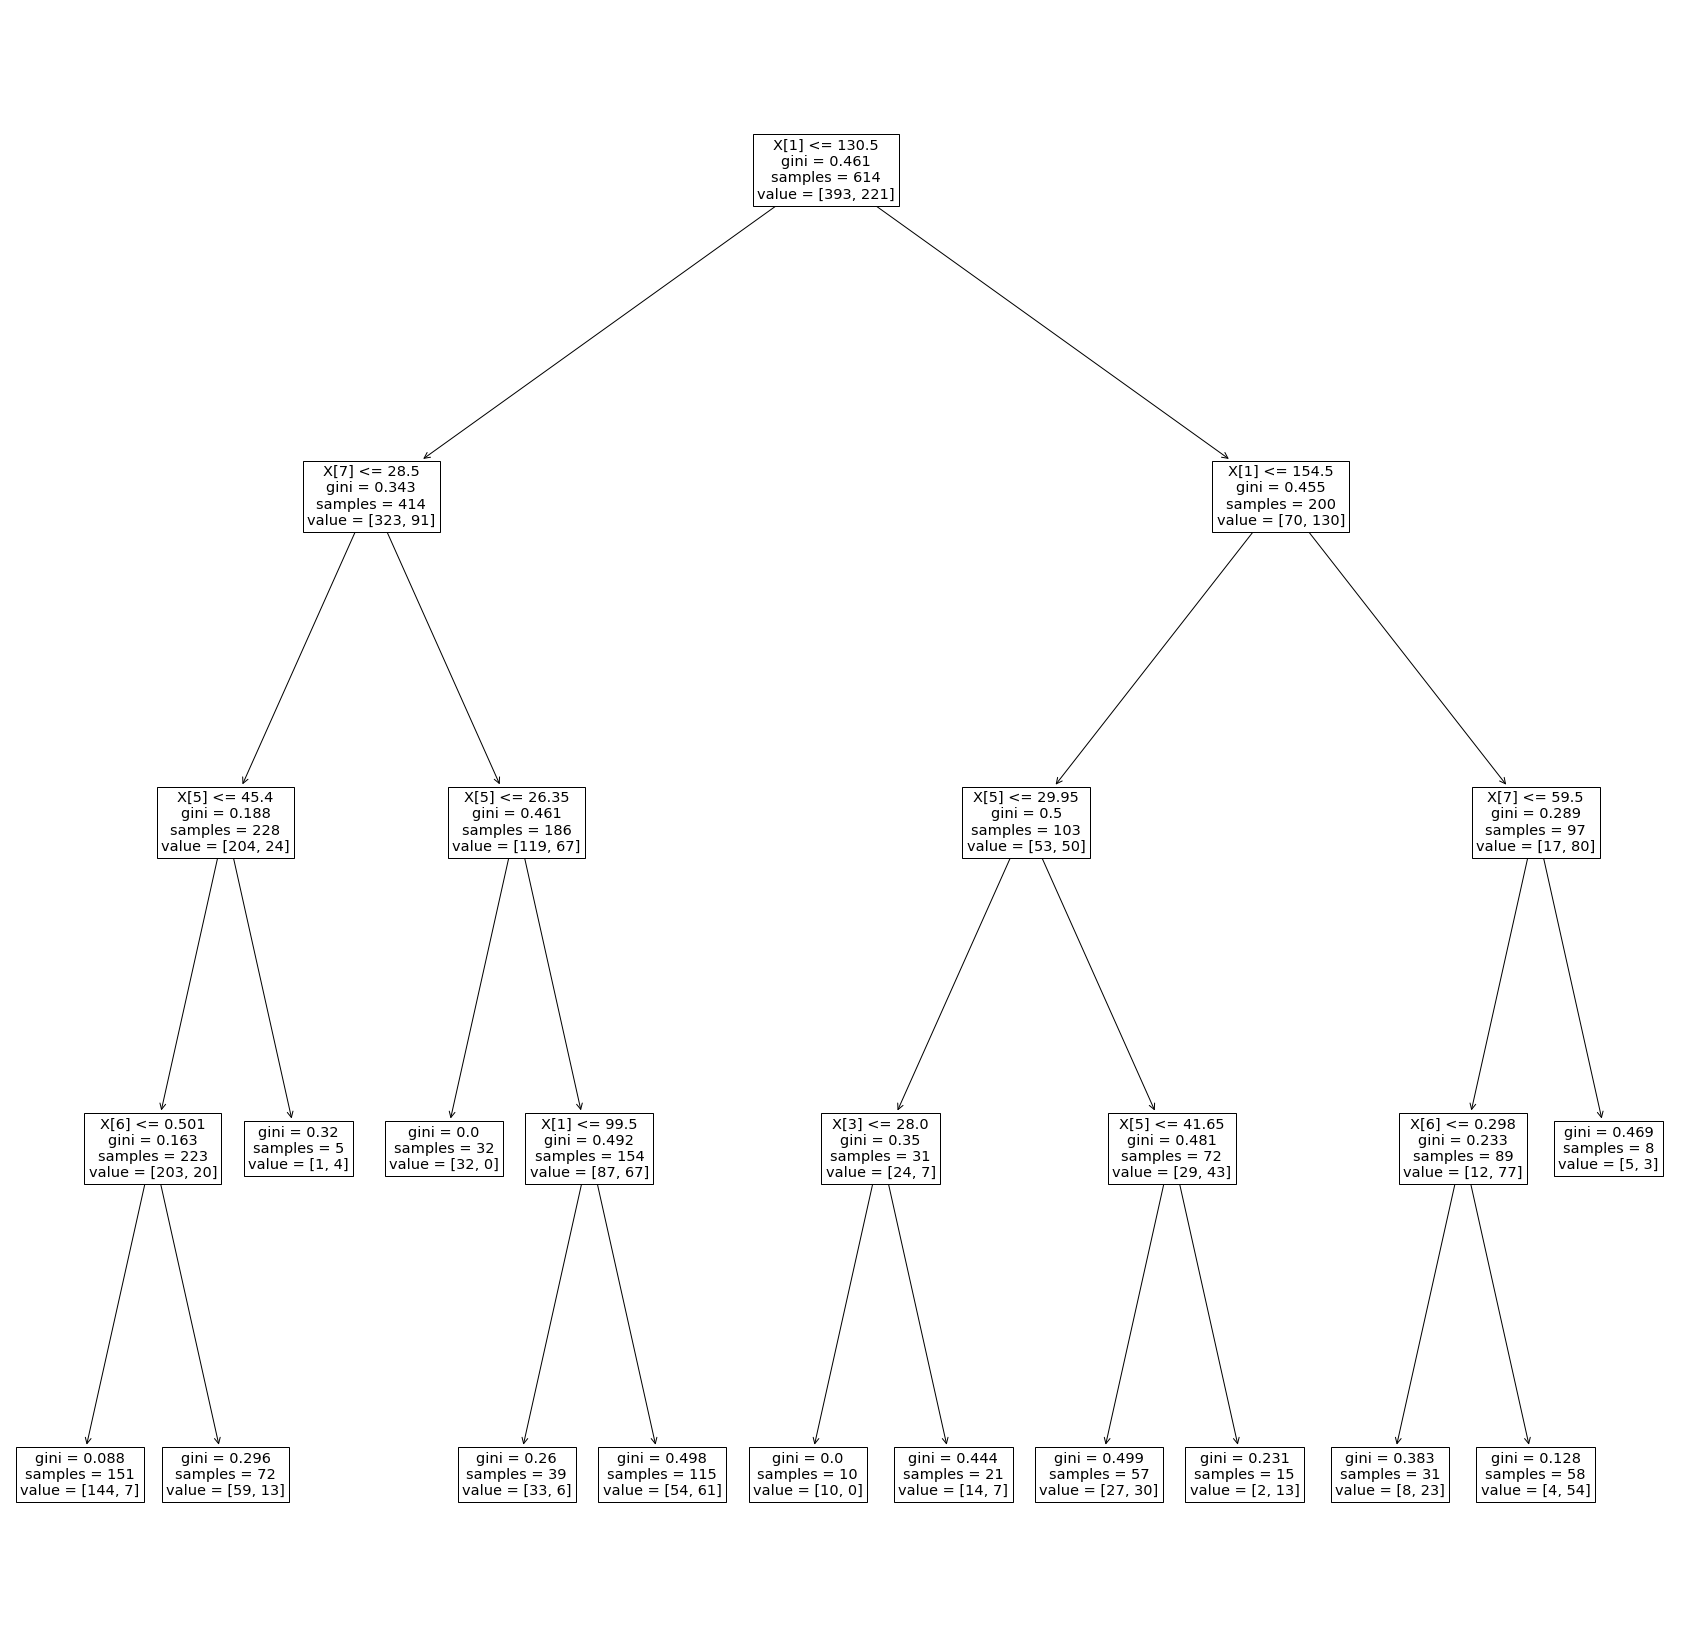

In [160]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(algo) 

## Create Confusion Matrix to compare the number of predicted values against actual labeled value 

In [161]:
Y_Prdct = algo.predict(X_test)
print(Y_Prdct)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.]


In [162]:
from sklearn import metrics
cf_mtrx = metrics.confusion_matrix(Y_test, Y_Prdct)
cf_mtrx

array([[83, 24],
       [ 9, 38]], dtype=int64)

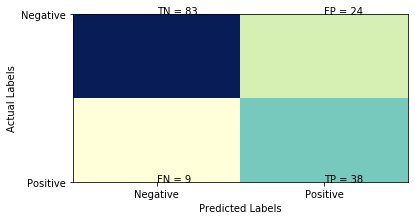

In [164]:
plt.clf()
plt.imshow(cf_mtrx,cmap="YlGnBu")
class_names = ['Negative','Positive']
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
tick_mrk = np.arange(len(classNames))
plt.xticks(tick_mrk, classNames)
plt.yticks(tick_mrk, classNames)
lst = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(lst[i][j])+" = "+str(cf_mtrx[i][j]))
plt.show()


### Data Interpretation of Confusion Matrix 
****
 <b>True negative (TN) and positive (TP) --> Of the total test dataset the decision tree model predicted 83 data rows as true negative and 38 data rows as true postive which means the actual labels matched the predicted labelsfor real diabetic and no diabetic labels.</b>
****
<b>False Positive --> Actually the sample Daibetic label is false/non-diabetic but the model predicts the sample as true or diabetic. So for the 24 non diabetic samples the model predicted all of them as diabetic which isnt the case.  </b> 
****
<b>False Negative --> Actually the sample Daibetic label is true/diabetic but the model predicts the sample as fasle or non- diabetic. So for the 9 diabetic samples the model predicted all of them as non-diabetic which isnt the case. 
</b>

## Fitting Gaussian Naive Bayes on the cleaned dataset and predicting its accuracy for test dataset.

In [63]:
from sklearn.naive_bayes import GaussianNB
new_algo = GaussianNB()
new_algo.fit(X_train, Y_train)
result = new_algo.score(X_test, Y_test)
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 75.325%


## Fitting KNeighborsClassifier on the cleaned dataset and predicting its accuracy for test dataset.

In [64]:
from sklearn.neighbors import KNeighborsClassifier
algo = KNeighborsClassifier()
algo.fit(X_train, Y_train)
result = algo.score(X_test, Y_test)
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 74.675%


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


### Model Selection  - Since the accuracy for decision tree classifer is higher for test data set than other algorithm as compared here

# SO, for this particular PIIMA dataset , we choose  Decision tree classifer model among three learning models

References:

1. Tan, Steinbach, Karpatne, Kumar, Introduction to Data Mining 2nd Ed., McGraw Hill 2018 https://www-users.cse.umn.edu/~kumar001/dmbook/index.php or https://www.amazon.com/Introduction-Mining-Whats-Computer-Science/dp/0133128903 
2. Aggarwal, Data Mining:The Text Book, pringer 2015 http://www.charuaggarwal.net/Data-Mining.htm or https://www.amazon.com/Data-Mining-Textbook-Charu-Aggarwal/dp/3319141414 
3. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 1st Edition  https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291 
4. McKinney,Python for Data Analysis : Data Wrangling with Pandas, NumPy, and IPython 3rd Ed.,O'REILLY ,https://wesmckinney.com/book/
5. https://machinelearningmastery.com/ 